<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/master/Tensorflow_2_0_IMDB_Sentiments_Classification_Using_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Sentiments Classification Using RNN-LSTM**

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 3.8MB 44.9MB/s 
     |████████████████████████████████| 450kB 35.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=2becd400a6fb142a5f97096a4dda227c0138689b2dfab5d73efaab99f5c29f9e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
print(tf.__version__)

2.0.0


# **Data Preprocessing**

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

17465344/17464789 [==============================] - 0s 0us/step


In [6]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [7]:
# padding any reviews which has more that 100 length
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [9]:
x_train.shape

(25000, 100)

In [10]:
voacab_size = 20000
embed_size = 128

# **Build LSTM**

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding # Embedding is advance version of converting words to vectors

In [15]:
model = Sequential()
model.add(Embedding(voacab_size, embed_size, input_shape=(x_train.shape[1],)))
model.add(LSTM(units=60, activation="tanh"))
model.add(Dense(units=1, activation="sigmoid"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 71s 3ms/sample - loss: 0.4290 - accuracy: 0.7903 - val_loss: 0.3480 - val_accuracy: 0.8493
Epoch 2/5
25000/25000 [==============================] - 66s 3ms/sample - loss: 0.2309 - accuracy: 0.9100 - val_loss: 0.3537 - val_accuracy: 0.8476
Epoch 3/5
25000/25000 [==============================] - 67s 3ms/sample - loss: 0.1481 - accuracy: 0.9484 - val_loss: 0.4176 - val_accuracy: 0.8374
Epoch 4/5
25000/25000 [==============================] - 69s 3ms/sample - loss: 0.0969 - accuracy: 0.9666 - val_loss: 0.4971 - val_accuracy: 0.8236
Epoch 5/5
25000/25000 [==============================] - 67s 3ms/sample - loss: 0.0686 - accuracy: 0.9778 - val_loss: 0.5711 - val_accuracy: 0.8270


In [20]:
history.history

{'accuracy': [0.79032, 0.90996, 0.94844, 0.96664, 0.97784],
 'loss': [0.429014869556427,
  0.23085207854747772,
  0.14805334017753602,
  0.0968973183631897,
  0.06862949329912663],
 'val_accuracy': [0.84932, 0.8476, 0.83736, 0.82356, 0.82704],
 'val_loss': [0.34796087953567506,
  0.3537440066051483,
  0.4175962162017822,
  0.49714656984329225,
  0.5710806356430054]}

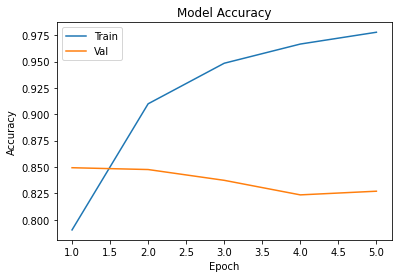

In [22]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(range(1, 6), history.history["accuracy"])
plt.plot(range(1, 6), history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

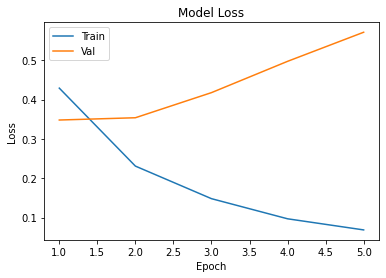

In [23]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(range(1, 6), history.history["loss"])
plt.plot(range(1, 6), history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

The model is just an example. The accuracy is pretty low and can be improved by adding more layers to it.